# Neural Network using tensorflow
for this model whe used some information from "https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/"

In [1]:
# import libraries
import tensorflow.keras as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import keras_tuner as kt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
# load data
complete_df = pd.read_csv('data/AmesHousingNN.csv')
complete_df = complete_df.drop('Unnamed: 0', axis=1)
display(complete_df)

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice.1
0,0,0,0,0,1,0,0,0,0,0,...,0.916104,0.221342,-0.358889,-0.103618,-0.286787,-0.063325,-0.089841,-0.445524,1.674241,5.332438
1,0,0,0,0,1,0,0,0,0,0,...,0.363260,-0.703563,-0.358889,-0.103618,1.844022,-0.063325,-0.089841,-0.076731,1.674241,5.021189
2,0,0,0,0,1,0,0,0,0,0,...,2.361397,-0.166522,-0.358889,-0.103618,-0.286787,-0.063325,21.884177,-0.076731,1.674241,5.235528
3,0,0,0,0,1,0,0,0,0,0,...,-0.742429,-0.703563,-0.358889,-0.103618,-0.286787,-0.063325,-0.089841,-0.814316,1.674241,5.387390
4,0,0,0,0,0,0,0,0,0,1,...,0.931900,-0.196357,-0.358889,-0.103618,-0.286787,-0.063325,-0.089841,-1.183109,1.674241,5.278525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2898,0,0,0,0,0,0,0,0,0,0,...,0.205304,-0.703563,-0.358889,-0.103618,-0.286787,-0.063325,-0.089841,-1.183109,-1.359194,5.153815
2899,0,0,0,0,1,0,0,0,0,0,...,0.552806,-0.703563,-0.358889,-0.103618,-0.286787,-0.063325,-0.089841,-0.076731,-1.359194,5.117271
2900,0,0,0,0,0,0,0,0,0,0,...,-0.110607,-0.226193,-0.358889,-0.103618,-0.286787,-0.063325,1.140704,0.292061,-1.359194,5.120574
2901,0,0,0,0,1,0,0,0,0,0,...,1.153037,-0.136686,-0.358889,-0.103618,-0.286787,-0.063325,-0.089841,-0.814316,-1.359194,5.230449


In [3]:
# split data into input and target
target = complete_df['SalePrice']
input_df = complete_df.drop('SalePrice', axis=1)

display(input_df.head())

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice.1
0,0,0,0,0,1,0,0,0,0,0,...,0.916104,0.221342,-0.358889,-0.103618,-0.286787,-0.063325,-0.089841,-0.445524,1.674241,5.332438
1,0,0,0,0,1,0,0,0,0,0,...,0.363260,-0.703563,-0.358889,-0.103618,1.844022,-0.063325,-0.089841,-0.076731,1.674241,5.021189
2,0,0,0,0,1,0,0,0,0,0,...,2.361397,-0.166522,-0.358889,-0.103618,-0.286787,-0.063325,21.884177,-0.076731,1.674241,5.235528
3,0,0,0,0,1,0,0,0,0,0,...,-0.742429,-0.703563,-0.358889,-0.103618,-0.286787,-0.063325,-0.089841,-0.814316,1.674241,5.387390
4,0,0,0,0,0,0,0,0,0,1,...,0.931900,-0.196357,-0.358889,-0.103618,-0.286787,-0.063325,-0.089841,-1.183109,1.674241,5.278525


In [4]:
# convert the pandas dataframes to numpy ndarrays
X_np = input_df.to_numpy()
y_np = target.to_numpy()

# split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, train_size=0.7, random_state=1265599650)

# find number of features
n_features = input_df.shape[1]

In [5]:
def build_model(hp):
    """
    This function computes a/the best neural network for the given data
    
    source: "https://keras.io/guides/keras_tuner/getting_started/"
    """
    m1 = tf.metrics.RootMeanSquaredError()
    m2 = 'mean_absolute_percentage_error'
    
    model = Sequential()
    #model.add(Dense(n_features, activation='relu'))
    
    # tune number of layers
    for i in range(hp.Int("numlayers", 1, 3)):
        model.add(
            Dense(
                # Tune number of units separately.
                units=hp.Int(f"units{i}", min_value=32, max_value=512, step=32),
                activation="relu"),
            )
        
    if hp.Boolean("dropout"):
        model.add(Dropout(rate=0.25))
        
        
    #model.add(Dense(units=hp.Int("units", min_value=32, max_value=512, step=32),
            # Tune the activation function to use.
     #       activation=hp.Choice("activation", ["relu", "tanh"]),)
    
    model.add(Dense(1, activation='relu'))
    model.compile(optimizer='Adam', loss=tf.metrics.mean_squared_error, metrics=[m1, m2])
    return model

tuner = kt.RandomSearch(
    hypermodel=build_model,
    objective="val_loss",
    max_trials=5,
    executions_per_trial=2,
    overwrite=True,
    #directory="my_dir",
    #project_name="helloworld",
)

tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
best_model = tuner.get_best_models()[0]

Trial 5 Complete [00h 00m 12s]
val_loss: 0.02128539141267538

Best val_loss So Far: 0.014210573863238096
Total elapsed time: 00h 01m 02s
INFO:tensorflow:Oracle triggered exit


In [6]:
"""
Tihs piece of code is not used, but we experimented with it.
"""
# define metrics
# Root Mean Square Error function from Keras Metrics. 
# source: https://www.tensorflow.org/api_docs/python/tf/keras/metrics/RootMeanSquaredError
m1 = tf.metrics.RootMeanSquaredError()
m2 = 'mean_absolute_percentage_error'

# create layers

# for the hidden layer we choose ReLu as our activation function since it is 
# less susceptible to vanishing gradients that prevent deep models from being trained
# for a regression model we use an output layer without any activation function 
# as we are interested in numerical values without any transformation
model = tf.Sequential()

# input layer
model.add(Dense(n_features, activation='relu'))
#model.add(Dropout(0.2))
#model.add(BatchNormalization())

# hidden layer 1
#model.add(Dense(32, activation='relu'))
#model.add(Dropout(0.2))
#model.add(BatchNormalization())

# hidden layer 2
#model.add(Dense(int(0.66*n_features), activation='relu'))
#model.add(Dropout(0.2))
#model.add(BatchNormalization())

# output layer
model.add(Dense(1, input_shape=(32,)))

# compile model
# use Adam as optimizer because of fast and accurate converging 
# source: https://medium.com/mdr-inc/from-sgd-to-adam-c9fce513c4bb 
model.compile(optimizer='Adam', loss=tf.metrics.mean_squared_error, metrics=[m1, m2])


In [14]:
# fit the model
# choose batch size of 32 after trying 32, 64 and 128
# source: https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch
best_model.fit(X_train, y_train,
          batch_size=32, epochs=200,
          validation_data=(X_test, y_test))

Epoch 1/200
64/64 [==============================] - 0s 5ms/step - loss: 0.0042 - root_mean_squared_error: 0.0649 - mean_absolute_percentage_error: 0.9797 - val_loss: 0.0061 - val_root_mean_squared_error: 0.0783 - val_mean_absolute_percentage_error: 0.9858
Epoch 2/200
64/64 [==============================] - 0s 4ms/step - loss: 0.0021 - root_mean_squared_error: 0.0455 - mean_absolute_percentage_error: 0.6818 - val_loss: 0.0088 - val_root_mean_squared_error: 0.0937 - val_mean_absolute_percentage_error: 1.4589
Epoch 3/200
64/64 [==============================] - 0s 5ms/step - loss: 0.0028 - root_mean_squared_error: 0.0528 - mean_absolute_percentage_error: 0.8058 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0676 - val_mean_absolute_percentage_error: 0.8525
Epoch 4/200
64/64 [==============================] - 0s 5ms/step - loss: 0.0021 - root_mean_squared_error: 0.0463 - mean_absolute_percentage_error: 0.6808 - val_loss: 0.0045 - val_root_mean_squared_error: 0.0674 - val_mean_absolu

Epoch 33/200
64/64 [==============================] - 0s 5ms/step - loss: 0.0015 - root_mean_squared_error: 0.0387 - mean_absolute_percentage_error: 0.5800 - val_loss: 0.0043 - val_root_mean_squared_error: 0.0658 - val_mean_absolute_percentage_error: 0.8924
Epoch 34/200
64/64 [==============================] - 0s 4ms/step - loss: 0.0028 - root_mean_squared_error: 0.0526 - mean_absolute_percentage_error: 0.7513 - val_loss: 0.0073 - val_root_mean_squared_error: 0.0855 - val_mean_absolute_percentage_error: 1.2428
Epoch 35/200
64/64 [==============================] - 0s 5ms/step - loss: 0.0019 - root_mean_squared_error: 0.0437 - mean_absolute_percentage_error: 0.6420 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0625 - val_mean_absolute_percentage_error: 0.8381
Epoch 36/200
64/64 [==============================] - 0s 4ms/step - loss: 0.0016 - root_mean_squared_error: 0.0406 - mean_absolute_percentage_error: 0.6019 - val_loss: 0.0053 - val_root_mean_squared_error: 0.0728 - val_mean_ab

Epoch 65/200
64/64 [==============================] - 0s 4ms/step - loss: 0.0014 - root_mean_squared_error: 0.0374 - mean_absolute_percentage_error: 0.5495 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0632 - val_mean_absolute_percentage_error: 0.7568
Epoch 66/200
64/64 [==============================] - 0s 4ms/step - loss: 0.0011 - root_mean_squared_error: 0.0331 - mean_absolute_percentage_error: 0.4766 - val_loss: 0.0077 - val_root_mean_squared_error: 0.0877 - val_mean_absolute_percentage_error: 1.4557
Epoch 67/200
64/64 [==============================] - 0s 4ms/step - loss: 0.0039 - root_mean_squared_error: 0.0624 - mean_absolute_percentage_error: 0.9813 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0663 - val_mean_absolute_percentage_error: 0.8991
Epoch 68/200
64/64 [==============================] - 0s 4ms/step - loss: 0.0030 - root_mean_squared_error: 0.0549 - mean_absolute_percentage_error: 0.8307 - val_loss: 0.0033 - val_root_mean_squared_error: 0.0573 - val_mean_ab

64/64 [==============================] - 0s 4ms/step - loss: 0.0021 - root_mean_squared_error: 0.0462 - mean_absolute_percentage_error: 0.6921 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0522 - val_mean_absolute_percentage_error: 0.6897
Epoch 97/200
64/64 [==============================] - 0s 4ms/step - loss: 0.0011 - root_mean_squared_error: 0.0325 - mean_absolute_percentage_error: 0.4825 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0534 - val_mean_absolute_percentage_error: 0.7298
Epoch 98/200
64/64 [==============================] - 0s 4ms/step - loss: 0.0015 - root_mean_squared_error: 0.0386 - mean_absolute_percentage_error: 0.5625 - val_loss: 0.0033 - val_root_mean_squared_error: 0.0574 - val_mean_absolute_percentage_error: 0.7514
Epoch 99/200
64/64 [==============================] - 0s 4ms/step - loss: 6.5319e-04 - root_mean_squared_error: 0.0256 - mean_absolute_percentage_error: 0.3689 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0532 - val_mean_absolute_pe

64/64 [==============================] - 0s 5ms/step - loss: 0.0015 - root_mean_squared_error: 0.0387 - mean_absolute_percentage_error: 0.5511 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0569 - val_mean_absolute_percentage_error: 0.7501
Epoch 128/200
64/64 [==============================] - 0s 5ms/step - loss: 0.0022 - root_mean_squared_error: 0.0469 - mean_absolute_percentage_error: 0.7194 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0645 - val_mean_absolute_percentage_error: 0.8447
Epoch 129/200
64/64 [==============================] - 0s 5ms/step - loss: 0.0019 - root_mean_squared_error: 0.0440 - mean_absolute_percentage_error: 0.6729 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0511 - val_mean_absolute_percentage_error: 0.6651
Epoch 130/200
64/64 [==============================] - 0s 5ms/step - loss: 0.0011 - root_mean_squared_error: 0.0325 - mean_absolute_percentage_error: 0.4673 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0542 - val_mean_absolute_per

64/64 [==============================] - 0s 5ms/step - loss: 0.0012 - root_mean_squared_error: 0.0349 - mean_absolute_percentage_error: 0.5028 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0626 - val_mean_absolute_percentage_error: 0.9209
Epoch 159/200
64/64 [==============================] - 0s 4ms/step - loss: 6.3682e-04 - root_mean_squared_error: 0.0252 - mean_absolute_percentage_error: 0.3545 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0513 - val_mean_absolute_percentage_error: 0.6725
Epoch 160/200
64/64 [==============================] - 0s 4ms/step - loss: 0.0012 - root_mean_squared_error: 0.0348 - mean_absolute_percentage_error: 0.5229 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0524 - val_mean_absolute_percentage_error: 0.6887
Epoch 161/200
64/64 [==============================] - 0s 5ms/step - loss: 5.3152e-04 - root_mean_squared_error: 0.0231 - mean_absolute_percentage_error: 0.3273 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0502 - val_mean_abso

64/64 [==============================] - 0s 5ms/step - loss: 0.0012 - root_mean_squared_error: 0.0345 - mean_absolute_percentage_error: 0.5202 - val_loss: 0.0056 - val_root_mean_squared_error: 0.0746 - val_mean_absolute_percentage_error: 1.1897
Epoch 190/200
64/64 [==============================] - 0s 4ms/step - loss: 0.0010 - root_mean_squared_error: 0.0321 - mean_absolute_percentage_error: 0.4587 - val_loss: 0.0033 - val_root_mean_squared_error: 0.0570 - val_mean_absolute_percentage_error: 0.8169
Epoch 191/200
64/64 [==============================] - 0s 5ms/step - loss: 6.4741e-04 - root_mean_squared_error: 0.0254 - mean_absolute_percentage_error: 0.3766 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0530 - val_mean_absolute_percentage_error: 0.7010
Epoch 192/200
64/64 [==============================] - 0s 5ms/step - loss: 5.2234e-04 - root_mean_squared_error: 0.0229 - mean_absolute_percentage_error: 0.3359 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0508 - val_mean_abso

In [15]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 192)               52032     
                                                                 
 dense_1 (Dense)             (None, 416)               80288     
                                                                 
 dense_2 (Dense)             (None, 288)               120096    
                                                                 
 dense_3 (Dense)             (None, 1)                 289       
                                                                 
Total params: 252,705
Trainable params: 252,705
Non-trainable params: 0
_________________________________________________________________


In [16]:
tuner.search_space_summary()

Search space summary
Default search space size: 5
numlayers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 3, 'step': 1, 'sampling': None}
units0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
dropout (Boolean)
{'default': False, 'conditions': []}
units1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}


In [17]:
tuner.results_summary()

Results summary
Results in .\untitled_project
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
numlayers: 3
units0: 192
dropout: False
units1: 416
units2: 288
Score: 0.014210573863238096
Trial summary
Hyperparameters:
numlayers: 2
units0: 64
dropout: False
units1: 320
units2: 288
Score: 0.01679666619747877
Trial summary
Hyperparameters:
numlayers: 2
units0: 160
dropout: True
units1: 352
units2: 160
Score: 0.02128539141267538
Trial summary
Hyperparameters:
numlayers: 1
units0: 416
dropout: True
units1: 320
units2: 288
Score: 0.02422191947698593
Trial summary
Hyperparameters:
numlayers: 3
units0: 128
dropout: True
units1: 32
units2: 32
Score: 0.03558536432683468


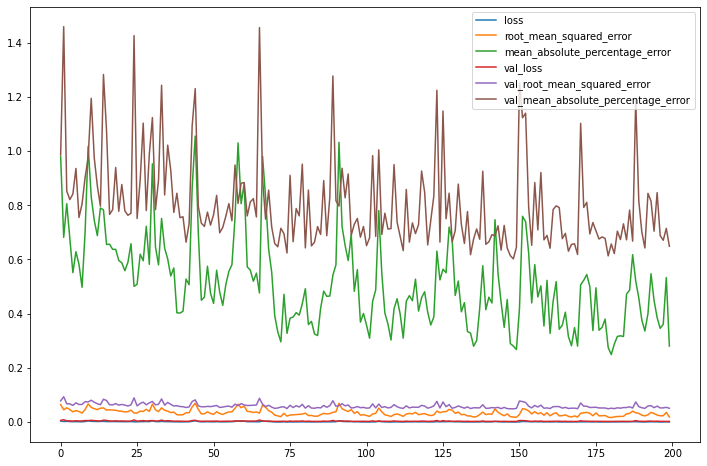

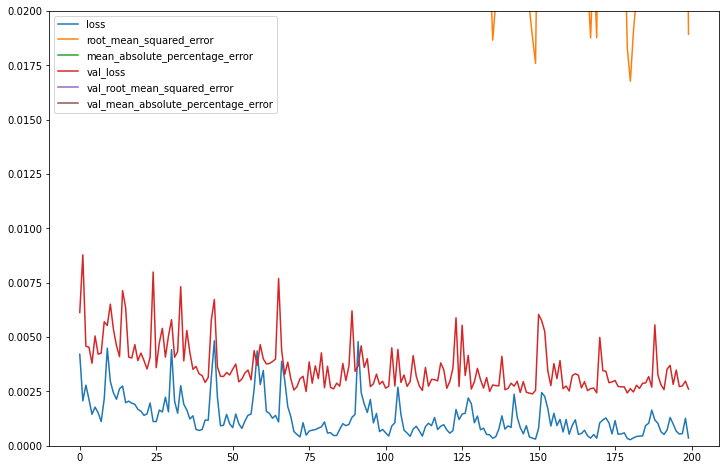

In [18]:
loss_df = pd.DataFrame(best_model.history.history)
#display(loss_df)
loss_df.plot(figsize=(12,8))
plt.show()

loss_df.plot(figsize=(12,8))
plt.ylim((0,0.02))
plt.show()

In [19]:
from sklearn import metrics

y_pred = best_model.predict(X_test)
# accuracy 
print('Variance score:',metrics.explained_variance_score(y_test,y_pred))

Variance score: 0.9205615897504276


### Model 2

In [13]:
#### verbeterpunten:
# validation data gebruiken                           
# k folds
# andere metrics voor aflezen                     check
# adam vs andere andere sgd methods testen        check, Adam ziet er het best uit
# hidden layers toevoegen 
# dropout layers toevoegen                        dropout layers hebben geen positief effect op het model
# aantal nodes per layer aanpassen
# batchsize aanpassen (32, 64 of 128)             check, 32 lijkt het beste te werken
# aantal epochs                                   check, na 20 epochs lijkt het model het meest te leren, daarna improved het niet heel veel meer                                     
# onze loss plotten                               check
